# Выручка+

**Описание проекта:**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Цель исследования:**

1. Приоритизировать гипотезы, подготовленные вместе с отделом маркетинга.
2. Проанализировать A/B-тест и получить результаты, на основе которых будут приниматься решения для увеличения выручки.

**Ход исследования:**

Данные о гипотезах я получу из файла ```/datasets/hypothesis.csv```, данные о заказах пользователей - ```/datasets/orders.csv```, данные о пользователях - ```/datasets/visitors.csv```. О качестве данных ничего не известно, поэтому понадобится обзор данных перед тем, как приступить к анализу.

На этапе ознакомления с данными мне необходимо убедиться в качестве полученных данных. При наличие пропусков в данных я их обработаю. Затем, мне нужно проверить данные на аномалии, чтобы результаты анализа A/B-теста были корректными для принятия дальнейших решений об увеличении выручки интернет-магазина.

После обработки данных мне необходимо выполнить приоритизацию всех гипотез из подготовленного списка. Я применю разные методы приоритизации, чтобы сравнить полученные результаты.

Также необходимо проанализировать результаты A/B-теста. Я сформирую датафреймы с кумулятивными данными и построю для них графики. Затем, мне нужно определить, какое решение следует принять на основе результатов анализа проведенного теста.

В конце проекта необходимо сформулировать общий вывод по всей проделанной работе.

Таким образом, моё исследование пройдет в 5 этапов:

- Изучение исходных данных + предобработка данных
- Приоритизация гипотез с помощью ICE SCORE
- Приоритизация гипотез с помощью RICE SCORE
- Проведение анализа A/B-теста
- Написание общего вывода

### Изучение общей информации

#### Импорт библиотек и создание датафреймов с данными из файлов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
from scipy import stats as st
import datetime as dt

warnings.filterwarnings('ignore')

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')

try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('orders.csv')

try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('visitors.csv')


#### Изучение полученных данных + Предобработка данных

***Изучение данных о списке гипотез для увеличения выручки интернет-магазина:***

In [3]:
print(display(hypothesis.head())) # предварительный просмотр

print(hypothesis.info()) # вывод информации о датафрейме

hypothesis.columns = hypothesis.columns.str.lower() # приведение названий столбцов к змеиному регистру

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


***Изучение данных о заказах пользователей:***

In [4]:
print(display(orders.head())) # предварительный просмотр

print(orders.info()) # вывод информации о датафрейме

orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d') # перевод типа столбца в тип даты (datetime)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


***Изучение данных о количестве пользователей в указанную дату в указанной группе A/B-теста:***

In [5]:
print(display(visitors.head())) # предварительный просмотр

print(visitors.info()) # вывод информации о датафрейме

print(visitors.describe()) # проверка данных на большие числа

visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d') # перевод типа столбца в тип даты (datetime)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
         visitors
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000


***Проверка данных на дубликаты:***

In [6]:
print(hypothesis.duplicated().sum())
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0
0


#### Вывод:

На этом этапе были изучены исходные данные. Были импортированы все библиотеки, необходимые для проведения анализа гипотез. В датафреймах ```hypothesis``` и ```orders``` названия столбцов были приведены к змеиному регистру. Столбцы ```date``` в датафреймах ```visitors``` и ```orders``` приведены к типу даты (datetime). Аномалии и дубликаты не обнаружены, числовые столбцы содержат реалистичные данные, можно приступать к следующему этапу анализа.

### Приоритизация данных

#### Приоритизация с помощью фреймворка ```ICE```

In [7]:
pd.options.display.max_colwidth = 300 # вводим параметр для отображения всех символов гипотез

hypo = hypothesis[['hypothesis']] # создаем датафрейм для вывода приоритетных гипотез 

# Формула для приоритизации гипотез с помощью ICE SCORE: ICE SCORE = (IMPACT * CONFIDENCE) / EFFORTS
hypo['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
display(hypo.sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод:**

- С помощью фреймворка ```ICE``` было найдено, что самой приоритетной для бизнеса гипотеза является гипотеза с номером 8.
- Топ 3 приоритетных гипотез - гипотеза с номером 8, гипотеза с номером 0 и гипотеза с номером 7. На них стоит обратить больше внимания при приоритизация с помощью фреймворка ```RICE```.
- Гипотезы с номерами 6 и 2 имеют приближенные показатели к топ 3 приоритетным гипотезам. Стоит обратить внимание на топ 5 гипотез при расчете *RICE SCORE*.

#### Приоритизация с помощью фреймворка ```RICE```

In [8]:
hypo_r = hypothesis[['hypothesis']]

# Формула для приоритизации гипотез с помощью RICE SCORE: RICE SCORE = (REACH * IMPACT * CONFIDENCE) / EFFORTS
hypo_r['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypo_r.sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:**

- С помощью фреймворка ```RICE``` гипотеза "*Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*" стала самой приоритетной для бизнеса. 
- Гипотеза "*Запустить акцию, дающую скидку на товар в день рождения*" с первого места спустилась на пятое место, так как ее охват гораздо меньше, ведь не у многих может быть день рождения в период проведения акции.
- Гипотеза "*Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа*" поднялась с пятого места на второе
- Гипотеза "*Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей*" спустилась на одну позицию, но в целом показывает хорошие результаты для рассмотрения ее в дальнейшем.
- Следующие гипотезы не являются для нас приоритетными гипотезами, так как при расчете *ICE SCORE* и *RICE SCORE* было обнаружено, что у них самые низкие показатели:
    - "*Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар*"
    - "*Запустить собственную службу доставки, что сократит срок доставки заказов*"
    - "*Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов*"
    - "*Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей*"

#### Вывод:

На этом этапе была выполнена приоритизация гипотез из заранее подготовленного списка. Было обнаружено, что приоритетными для нас гипотезами могут являться следующие гипотезы:

- *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*
- *Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа*
- *Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей*
- *Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию*

При применении фреймворка ```RICE``` приоритизация гипотез изменилась. Это связано с тем, что при расчете *RICE SCORE* мы добавляем еще один показатель - Reach (показатель того, скольких пользователей затронет изменение, которое вы хотите внести). 

Самой приоритетной гипотезой при расчете *ICE SCORE* является гипотеза "*Запустить акцию, дающую скидку на товар в день рождения*". Самой приоритетной гипотезой при расчете *RICE SCORE* является гипотеза "*Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*".

После того, как мы обнаружили приоритетные для нас гипотезы, можно приступать к анализу проведенного A/B-теста.

### Анализ A/B-теста

Для проведения дальнейшего анализа необходимо получить кумулятивные данные о заказах и пользователях. Создадим датафрейм ```cumulative_data``` со всеми нужными для анализа данными:

In [9]:
# Создание массива уникальных пар значений дат и групп теста
dates_group = orders[['date', 'group']].drop_duplicates()

# Получение агрегированных кумулятивных по дням данные о заказах
ok_orders = dates_group.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum'}), axis=1).sort_values(by=['date', 'group'])
ok_visitors = dates_group.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Объединение кумулятивных данных
cumulative_data = ok_orders.merge(ok_visitors, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Вывод датафрейма с кумулятивными данными
cumulative_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


Проверим на соответствие параметры датафрейма ```cumulative_data``` и одного из датафремов с исходными данными:

In [10]:
print(orders.info(), orders['date'].min(), orders['date'].max())
print()
print(cumulative_data.info(), cumulative_data['date'].min(), cumulative_data['date'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None 2019-08-01 00:00:00 2019-08-31 00:00:00

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   orders    62 non-null     int64         
 3   buyers    62 non-null     int64         
 4   revenue   62 non-null     int64       

Данные записались успешно, даты совпадают, типы столбцов не изменились. Можно приступать к дальнейшему анализу.

#### Построение графика кумулятивной выручки по группам

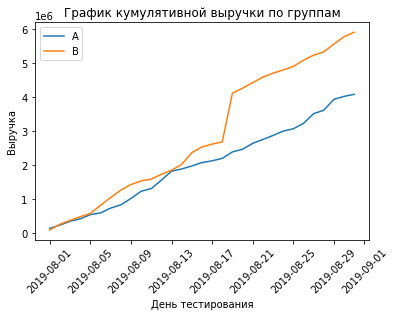

In [11]:
# Создание датафрейма с кумулятивным количество заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]

# Создание датафрейма с кумулятивным количество заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

# Построение графиков выручки для двух групп
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label = 'A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label = 'B')

plt.ylabel('Выручка')
plt.xlabel('День тестирования')
plt.title('График кумулятивной выручки по группам')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Вывод:**

Выручка увеличивается в течение всего теста. Можно заметить, что выручка для группы B в самом начале теста начинает превышать выручку для группы А и на протяжении всего A/B-теста лидерство сохраняется. На графике наблюдается резкий рост графика выручки для группы B. Можно предположить, что произошел всплеск числа заказов, либо появились слишком дорогие заказы в выборке.

#### Построение графика кумулятивного среднего чека по группам

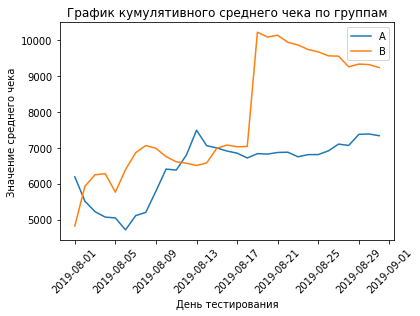

In [12]:
# Построение графика для группы A
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'] / cumulative_revenue_A['orders'], label = 'A')

# Построение графика для группы B
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'] / cumulative_revenue_B['orders'], label = 'B')
plt.xlabel('День тестирования')
plt.ylabel('Значение среднего чека')
plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Вывод:**

На графике наблюдается резкое падение для графика A в начале теста, однако потом он устанавливается на уровне 7000-8000. Можно предположить, что в группу A в первой половине теста попали маленькие заказы.

Для графика B ситуация иная: в первой половине теста наблюдаются резкие изменения графика, во второй половине теста график демонстрирует "взлет". Это можно означать, что туда попали огромные заказы, которые в несколько раз превышают нормальные показатели среднего чека.

#### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

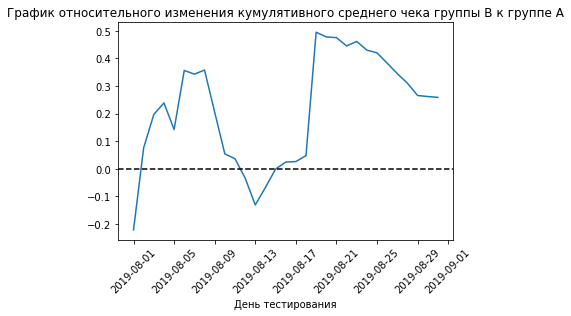

In [13]:
# Объединение данных в единый датафрейм
total_cumulative_data = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Построение отношения средних чеков
plt.plot(total_cumulative_data['date'], 
        (total_cumulative_data['revenueB']/total_cumulative_data['ordersB']) / (total_cumulative_data['revenueA']/total_cumulative_data['ordersA']) - 1)

# Добавление оси Х
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('День тестирования')
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

**Вывод:**

На графике наблюдается существенные различия между группами. График относительного изменения в первой половине теста резко растет, ближе к середине теста падает, а потом снова взлетает. Можно предположить, что на график повлияли заказы с очень крупным чеком.

#### Построение графика кумулятивного среднего количества заказов на посетителя по группам

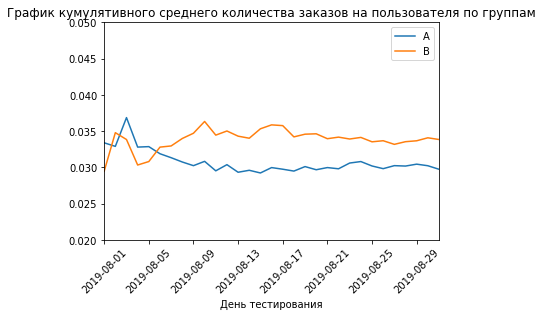

In [14]:
# Создание датафреймов с данными о заказах и пользователях, кто совершил хотя бы один заказ
cumulative_orders_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'orders', 'visitors']]
cumulative_orders_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'orders', 'visitors']]

# Построение графика для группы A
plt.plot(cumulative_orders_A['date'], cumulative_orders_A['orders'] / cumulative_orders_A['visitors'], label = 'A')

# Построение графика для группы B
plt.plot(cumulative_orders_B['date'], cumulative_orders_B['orders'] / cumulative_orders_B['visitors'], label = 'B')

plt.title('График кумулятивного среднего количества заказов на пользователя по группам')
plt.legend()
plt.axis([dt.datetime.strptime("2019-08-01", '%Y-%m-%d'), dt.datetime.strptime("2019-08-31", '%Y-%m-%d'), 0.02, 0.05])
plt.xticks(rotation=45)
plt.xlabel('День тестирования')
plt.show()

**Вывод:**

В начале теста показатели двух групп показывали резкое изменение. С помощью графика можно определить, что кумулятивное среднее количество заказов на пользователя в группе B больше, чем в группе А. Ближе к концу теста обе группы зафиксировались. В середине теста заметен небольшой рост значения для группы B. Можно предположить, что это связано с клиентами, которые совершили значительное количество заказов.

#### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

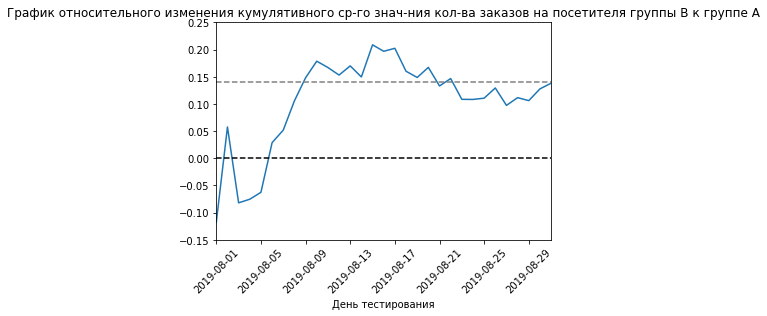

In [15]:
# Cоздание столбца с показателями среднего количества заказов на посетителя групп А и В
cumulative_orders_A['conversion'] = cumulative_orders_A['orders'] / cumulative_orders_A['visitors']
cumulative_orders_B['conversion'] = cumulative_orders_B['orders'] / cumulative_orders_B['visitors']

# Cклеиваем данные в один датафрейм, по которому будет строится график относительного изменения
total_cumulative_orders = (
    cumulative_orders_A[['date', 'conversion']]
    .merge(cumulative_orders_B[['date', 'conversion']], left_on='date', right_on = 'date', how='left', suffixes=['A', 'B']))

plt.plot(total_cumulative_orders['date'], total_cumulative_orders['conversionB'] / total_cumulative_orders['conversionA'] - 1)

plt.title('График относительного изменения кумулятивного ср-го знач-ния кол-ва заказов на посетителя группы В к группе А')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.axis([dt.datetime.strptime("2019-08-01", '%Y-%m-%d'), dt.datetime.strptime("2019-08-31", '%Y-%m-%d'), -0.15, 0.25])
plt.xticks(rotation=45)
plt.xlabel('День тестирования')
plt.show()

**Вывод:**

В начале теста лидер среди групп А и В сменялся, затем группа В вырвалась вперед. Во второй половине теста произошел рост графика. Можно предположить, что на это повлияли посетители с большим количество заказов. На графике видно, что группа B стабильно лидирует по показателям, и в конце теста показатель укрепляется. Для того, чтобы убедиться в результатах, необходимо проверить данные на выбросы и всплески в данных.

#### Построение точечного графика количества заказов по пользователям

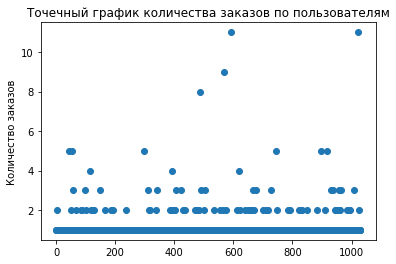

In [16]:
# Создание датафрейма с данными о количестве заказов для каждого пользователя
order_per_user = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
order_per_user.columns=['user_id', 'orders']

x_values = pd.Series(range(0,len(order_per_user['orders'])))
plt.scatter(x_values, order_per_user['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.show()

**Вывод:**

С помощью графика можно выяснить, что много пользователей оформили от одного до трех заказов. Посетителей с четырьмя и более заказами считать аномальными нельзя, так как их точная доля от общей выборки неизвестна. Для того, чтобы определить аномалии, можно найти перцентили количества заказов на одного пользователя.

#### Подсчет 95-го и 99-го перцентилей количества заказов на пользователя

In [17]:
np.percentile(order_per_user['orders'], [95, 99])

array([2., 4.])

**Вывод:**

- Пользователи, которые оформляли больше двух заказов, составляют не более 5% от общей группы теста.
- Пользователи, которые оформили более четырех заказов, составляют не более 1% от общей группы теста.

Следует выбрать 4 заказа на одного пользователя за верхнюю границу, чтобы убрать аномальные значения, которые могут повлиять на анализ A/B-теста.

#### Построение точечного графика стоимостей заказов

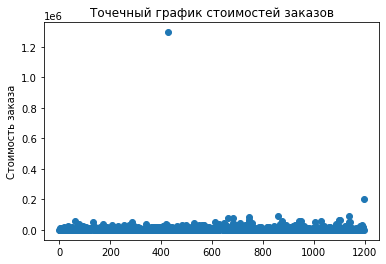

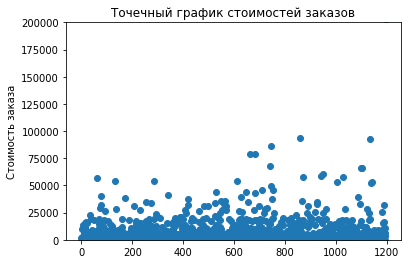

In [18]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.show()

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.ylim(0, 200000)
plt.show()

**Вывод:**

На графике наблюдаются аномальные значения, где стоимость заказа составляет 1.2 млн. и 200 тыс. Для того, чтобы выявить аномалии в диапазоне ниже 200 тысяч, необходимо найти перцентили стоимости заказов. Можно предположить, что в этом диапазоне находятся аномальные значения, так как на графике расположены одиночные точки. 

#### Подсчет 95-го и 99-го перцентилей стоимости заказов

In [19]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:**

- Заказы стоимостью более 28 тысяч составляют не более 5% от общего количества выборки.
- Заказы стоимость более 58 тысяч составляют не более 1% от общего количества выборки.

Следует выбрать стоимость заказа в размере 58 тысяч за верхнюю границу. В таком случае будут убраны аномальные значения, которые могут повлиять на результаты анализа.

#### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Чтобы провести дальнейший анализ, необходимо создать датафрейм со всеми данными о заказах пользователей, их визитах и выручке.

In [20]:
# Создание датафейма с количество посетителей за каждый день для группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Создание датафейма с кумулятивными данными о пользователях из группы А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# Создание датафейма с количество посетителей за каждый день для группы B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Создание датафейма с кумулятивными данными о пользователях из группы В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Создание датафейма с заказами посетителей и их выручкой за каждый день для группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Создание датафейма с кумулятивными данными о заказах посетителей и их кумулятивной выручкой за каждый день для группы А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

# Создание датафейма с заказами посетителей и их выручкой за каждый день для группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# Создание датафейма с кумулятивными данными о заказах посетителей и их кумулятивной выручкой за каждый день для группы В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

# Cоздание датафрейма со всеми необходимыми для анализа данными
main_data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

main_data.head(10) # проверка создания датафрейма

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,145,740818,153,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,161,837097,180,1270589,610,654,5239,5298
8,2019-08-09,16,188506,25,160812,177,1025603,205,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,193,1236098,228,1539203,406,369,6262,6277


Сформулируем гипотезы:

- Нулевая гипотеза: различий в среднем количестве заказов между группами нет.
- Альтернативная гипотеза: различия в среднем количестве заказов между группами есть.

Посчитаем статическую значимость различий в среднем количестве заказов:

In [21]:
# Создание таблицы заказов для группы А
orders_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

orders_users_A.columns=['user_id', 'orders']

# Создание таблицы заказов для группы B
orders_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

orders_users_B.columns=['user_id', 'orders']

# Создание таблиц, в которых пользователям из двух групп будут соответствовать количество заказов
dataA = pd.concat(
    [
        orders_users_A['orders'],
        pd.Series(
            0,
            index=np.arange(
                main_data['visitorsPerDateA'].sum() - len(orders_users_A['orders'])
            ),
            name='orders'
        ),
    ],
    axis=0,
)

dataB = pd.concat(
    [
        orders_users_B['orders'],
        pd.Series(
            0,
            index=np.arange(
                main_data['visitorsPerDateB'].sum() - len(orders_users_B['orders'])
            ),
            name='orders'
        ),
    ],
    axis=0,
)

# Применим критерий Манна-Уитни для проверки различия
print('P-value:', "{0:.3f}".format(st.mannwhitneyu(dataA, dataB)[1]))

# Найдем относительный прирост среднего количество заказов группы В
print('Разница средних показателей между группами:', "{0:.3f}".format(dataB.mean() / dataA.mean() - 1))

P-value: 0.017
Разница средних показателей между группами: 0.138


**Вывод:**

По "сырым" данным различия в среднем количестве заказов групп А и В есть:

- p-value меньше 0.05, значит, что следует отвергнуть нулевую гипотезу.
- Разница между группами составляет 13,8%

#### Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы:

- Нулевая гипотеза: различий в среднем чеке между группами нет.
- Альтернативная гипотеза: различия в среднем чеке между группами есть.

Посчитаем статическую значимость различий в среднем чеке заказа между группами:

In [22]:
print('P-value:', '{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Разница средних показателей между группами:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Разница средних показателей между группами: 0.259


**Вывод:**

По "сырым" данным различий в среднем чеке заказа групп А и В нет:

- p-value сильно превышает 0.05, следует сделать вывод, что причин отвергать нулевую гипотезу нет.
- Средний чек группы В значительно выше среднего чека группы А.

#### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Для того, чтобы очистить данные от аномалий, необходимо их найти, а затем создать датафрейм и исключить аномалии из данных. Ориентируемся на полученные данные из предыдущих пунктов (по перцентилям).

In [23]:
# Создание таблицы посетителей, которые совершили более двух заказов
usersWithManyOrders = pd.concat(
    [
        orders_users_A[orders_users_A['orders'] > np.percentile(order_per_user['orders'], 95)]['user_id'],
        orders_users_B[orders_users_B['orders'] > np.percentile(order_per_user['orders'], 95)]['user_id'],
    ],
    axis=0,
)

# Создание таблицы посетителей, которые совершили заказы со стоимостью более 28 тысяч
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']

clear_data = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Посчитаем статическую значимость среднего количества заказов на посетителя по очищенным данным из датафрейма ```clear_data```:

In [24]:
# Создание очищенных от аномалий таблиц, в которых посетителям из двух групп будут соответствовать количество заказов 
dataAFiltered = pd.concat(
    [
        orders_users_A[
            np.logical_not(orders_users_A['user_id'].isin(clear_data))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                main_data['visitorsPerDateA'].sum() - len(orders_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

dataBFiltered = pd.concat(
    [
        orders_users_B[
            np.logical_not(orders_users_B['user_id'].isin(clear_data))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                main_data['visitorsPerDateB'].sum() - len(orders_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Применим критерий Манна-Уитни для проверки различия
print('P-value:', "{0:.3f}".format(st.mannwhitneyu(dataAFiltered, dataBFiltered)[1]))

# Найдем относительный прирост среднего количество заказов группы В
print('Разница средних показателей между группами:', "{0:.3f}".format(dataBFiltered.mean() / dataAFiltered.mean() - 1))

P-value: 0.013
Разница средних показателей между группами: 0.173


**Вывод:**

Результаты по среднем количеству заказов на посетителя практически не изменились. P-value изменился на 0.004, а разница между группами А и В выросла с 13.8% до 17.3%

#### Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

In [26]:
print(
    'P-value:', '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(clear_data)))]['revenue'],
            orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(clear_data)))]['revenue'],
        )[1]
    )
)

print('Разница средних показателей между группами:', 
    "{0:.3f}".format(
        orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(clear_data)))]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(clear_data)))]['revenue'].mean() - 1
    )
)

P-value: 0.738
Разница средних показателей между группами: -0.020


**Вывод:**

Результаты для среднего чека заказа изменились:
- P-value увеличился незначительно (на 0.009)
- Разница средних показателей между группами изменилась с 0.259 на -0.02

#### Вывод:

На этапе анализа A/B-теста был проведен анализ кумулятивных данных о заказах посетителей интернет-магазина. С помощью графиков были обнаружены аномальные значения. Была найдена статическая значимость различий в среднем количестве заказов на посетителя и в среднем чеке заказов на основе "сырых" и "очищенных" данных.

Нахождение статической значимости различий по "сырым" данным:

- В среднем количестве заказов на посетителя: 
        
        p-value: 0.017
        разница между группами: 0.138
        
- В среднем чеке заказа:

        p-value: 0.729
        разница между группами: 0.259

Нахождение статической значимости различий по "очищенным" данным:

- В среднем количестве заказов на посетителя: 
        
        p-value: 0.013
        разница между группами: 0.173
        
- В среднем чеке заказа:

        p-value: 0.738
        разница между группами: -0.02

Полученные результаты:

- Есть статистически значимое различие по среднему количеству заказов на посетителя между группами по "сырым" и "очищенным" данным.
- Нет статистически значимого различия по среднему чеку заказа между группами ни по "сырым", ни по "очищенным" данным.
- График различия среднего количества заказов на посетителя между группами сообщает, что результаты группы А хуже группы В.
- График различия среднего чека говорит о том, что результаты группы В ухудшаются, но остаются лучшими среди групп А и В.

По результатам теста можно принять решение об остановке теста и признать его успешным, потому что вероятность того, что группа А на самом деле лучше группы В, является практически нулевой.

### Общий вывод

В работе были изучены исходные данные о заказах и визитах посетителей интернет-магазина. Столбцы были приведены к нужным типам, названия столбцов приведены в комфортный для анализа формат. Данные были проверены на пропуски и дубликаты. Были выявлены самые приоритетные гипотезы для увеличения выручки бизнеса. Был проведен анализ A/B-теста, на основе которого было принято решение об окончании теста, зафиксировав лидерство одной из групп.

На этапе приоритизации гипотез было выяснено:

- Приоритетными для нас гипотезами могут являться гипотезы с номерами 0, 2, 6, 7 и 8. 
- Самой приоритетной гипотезой при расчете *ICE SCORE* является гипотеза с номером 8.
- Самой приоритетной гипотезой при расчете *RICE SCORE* является гипотеза с номером 7.

Результаты A/B теста:

- Есть статистически значимое различие по среднему количеству заказов на посетителя между группами по "сырым" и "очищенным" данным.
- Нет статистически значимого различия по среднему чеку заказа между группами ни по "сырым", ни по "очищенным" данным.
- График различия среднего количества заказов на посетителя между группами сообщает, что результаты группы А хуже группы В.
- График различия среднего чека говорит о том, что результаты группы В ухудшаются, но остаются лучшими среди групп А и В.

По результатам было принято решение об остановке теста в пользу группы В.

В конце каждого этапа написаны выводы, с которыми можно ознакомиться.